In [18]:
import pandas as pd
import matplotlib
from scipy.stats import pearsonr
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib import style
style.use('ggplot')
import os
import wrangle
import datetime as dt
import viz

# PROJECT OVERVIEW

    The goal is to provide context to the death counts of covid in the US. Covid Deaths have been used to as a reason to change culture and pass new laws, these laws and restrictions have caused massive harm economicly, socially, and physically.

## Project Description

    All data is pulled from CDC Wonder database (https://wonder.cdc.gov/) from 2018 to current. The data is then cleaned and organized into a table. The table is then used to create a report that provides context to the death counts of covid in the US. The report is then used to create a visualization that shows the death counts of covid in the US. With more time, the visualization will be updated to include more information and will show future death predictions.

## Goals
1. Create a report that provides context to the death counts of covid in the US.
2. Create visualizations that shows the death counts of covid in the US.

---

## Acquire Data

    The data is all available in the CDC Wonder database(https://wonder.cdc.gov/). An API is available for data before 2018 but that is not useful for the project. Several queries were made to the database to get the data that is needed and these queries are saved in a .txt files and combined using pandas. CDC limits queries to 75,000 rows per query and significantly more data was needed.

    The acquisition is done in the wrangle.py module.

## Preparing the Data

The data is in a mostly usable format with some exceptions. The exceptions are:
1. notes are included in the table
2. redundant columns are included in the table
3. some columns are not in the table but are needed for the report
4. dates need to be reformatted
5. numerical columns need to be converted to int
6. general cleaning of column names (lowercase, remove spaces, etc.)

## No Outliers
    Outliers would be removed but there are none. 
    * However, Mar 2022 has some incomplete data and is removed

---

## Exploratory Data Analysis
    Here I will look at the data and see if there are any trends or patterns that could be used to predict future death counts. Stats testing is also done here.


In [19]:
df = wrangle.wrangle_data()
df.info()# check the dataframe

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19214 entries, 0 to 19213
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   age_group   19214 non-null  object        
 1   gender      19214 non-null  object        
 2   month       19214 non-null  datetime64[ns]
 3   cause       19214 non-null  object        
 4   cause_code  19214 non-null  object        
 5   deaths      19214 non-null  int64         
 6   year        19214 non-null  object        
 7   population  19214 non-null  int64         
 8   crude_rate  19214 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 1.5+ MB


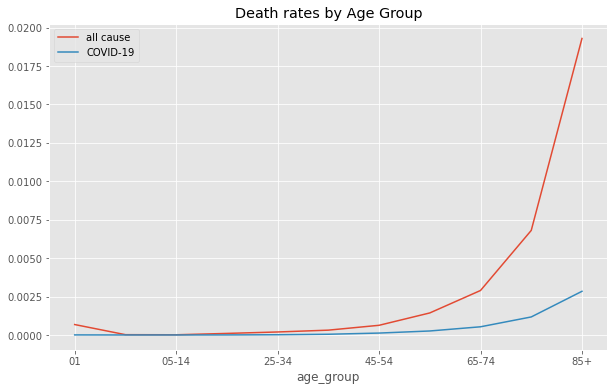

In [20]:
viz.death_rates_by_age_group()

Here we can see that both all cause deaths and covid deaths increase with age with a smaller correlation for covid deaths than for all cause deaths.

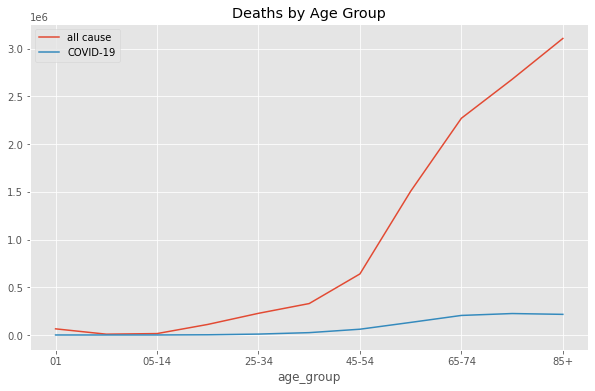

In [21]:
viz.deaths_by_age_group()

Furthermore we can see with total deaths that covid is not comparatively large compared to all cause deaths.

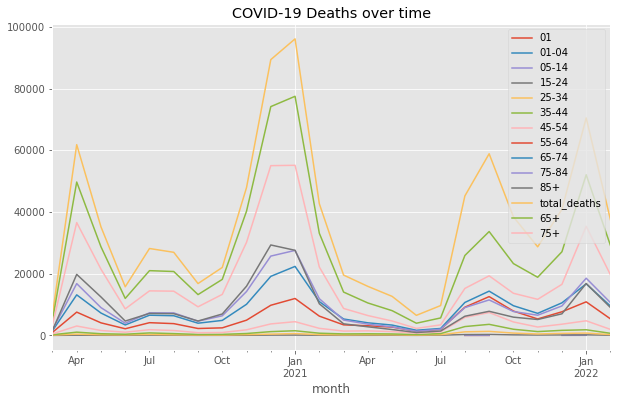

In [22]:
viz.covid_vs_time()

Covid deaths go up and down time but the majority of deaths are in the 75+ age group but still a lot is covered in the 65+ age group.

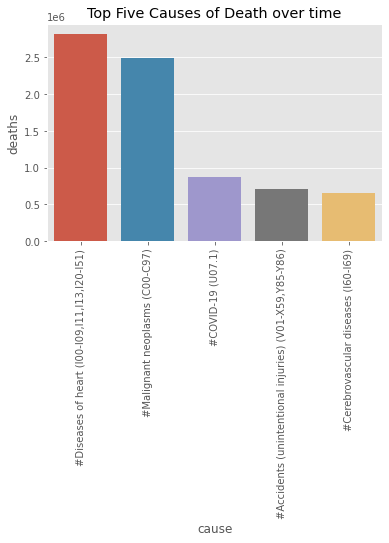

In [23]:
viz.top_five_causes_over_time()

Covid is a in the top 5 of all death causes in the US for this period but is low compared to heart disease and tumors, and as you will see other deaths rose over this time as well.

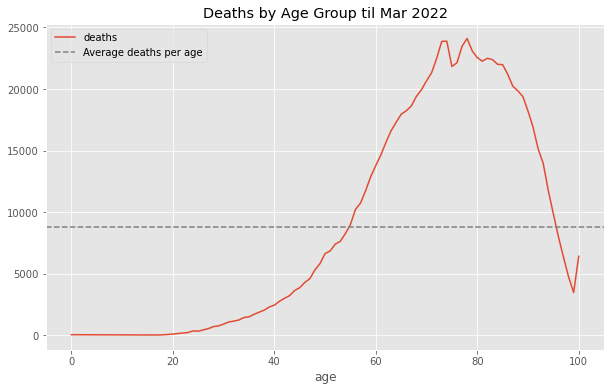

In [24]:
viz.deaths_by_age_group_with_avg()

## Is there a correlation between age and covid deaths?

    Lets test this hypothesis

$H_0$ : There is no linear relationship between covid deaths and the age.
 
$H_A$ : There is a linear relationship between covid deaths and the age.

In [25]:
covid_all_ages= wrangle.get_covid_all_ages()
# alpha of 0.05 gives us 95% confidence interval
# can reject null if the p-value is less than 0.05
# since we are comparing two continuous variables, 
# we can use the pearson R test

# use pearsonr to find the correlation between the covid deaths and age
corr, p = pearsonr(covid_all_ages['age'], covid_all_ages['deaths'])
print(f'The correlation between age and deaths is {corr} with a p-value of {p}')
print('We can reject the null hypothesis due to the extremely low p-value')



The correlation between age and deaths is 0.3883672296092304 with a p-value of 1.9873347902245635e-130
We can reject the null hypothesis due to the extremely low p-value


~~$H_0$ : There is no linear relationship between covid deaths and the age.~~
 
$H_A$ : There is a linear relationship between covid deaths and the age.

    Age is strongly correlated with covid deaths
    # avg age of covid death = 73 years old

---

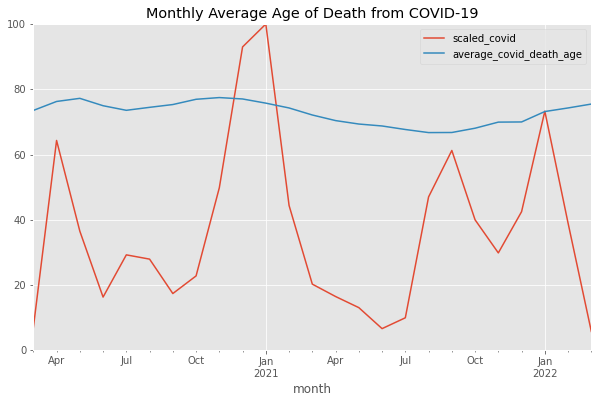

In [26]:
viz.monthly_avg_age_covid()

## Correlation between gender and covid deaths
  


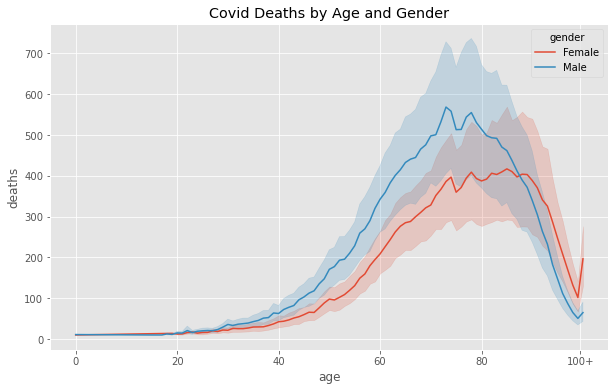

In [27]:
viz.covid_deaths_by_age_and_gender()

    Lets test this hypothesis

$H_0$ : There is no correlation between covid deaths and the gender.
 
$H_A$ : There is  correlation between covid deaths and the gender.

In [28]:
# alpha of 0.05 gives us 95% confidence interval
# can reject null if the p-value is less than 0.05
# since we are comparing one continuous variable to a categorical variable,
# we can use the ttest

# use a ttest to find the correlation between the covid deaths and gender
male = covid_all_ages[covid_all_ages.gender == 'Male']
female = covid_all_ages[covid_all_ages.gender == 'Female']
test_stats = stats.ttest_ind(male.deaths, female.deaths)
print(f'The correlation between gender and deaths is {test_stats[0]} with a p-value of {test_stats[1]}')
print('We can reject the null hypothesis due to the extremely low p-value')

The correlation between gender and deaths is 4.97211327792386 with a p-value of 6.930770048769238e-07
We can reject the null hypothesis due to the extremely low p-value


    Lets test this hypothesis

~~$H_0$ : There is no correlation between covid deaths and the gender.~~
 
$H_A$ : There is  correlation between covid deaths and the gender.

There is a correlation between gender and covid deaths

## How did the overall death rate change when covid started?


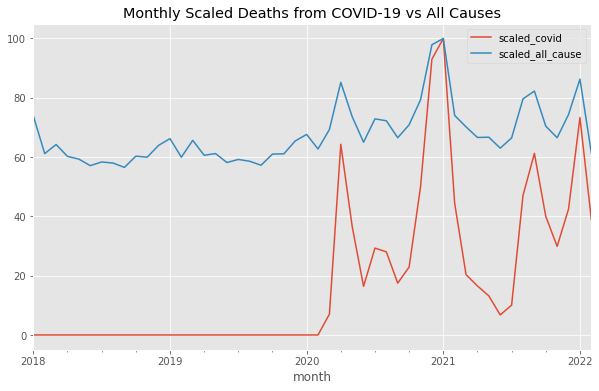

In [29]:
viz.monthly_scaled_deaths_cause_and_covid()

# Were there any major changes in average age of death? 

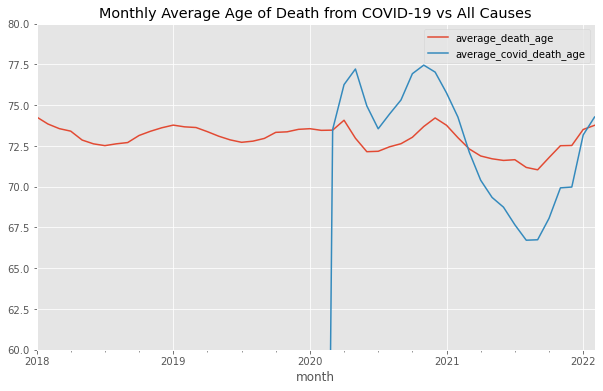

In [30]:
viz.monthly_avg_age_all_cause_and_covid()

There is a minor dip around the time the Delta variant was prevalent but nothing signifigant

## Compare covid to common causes

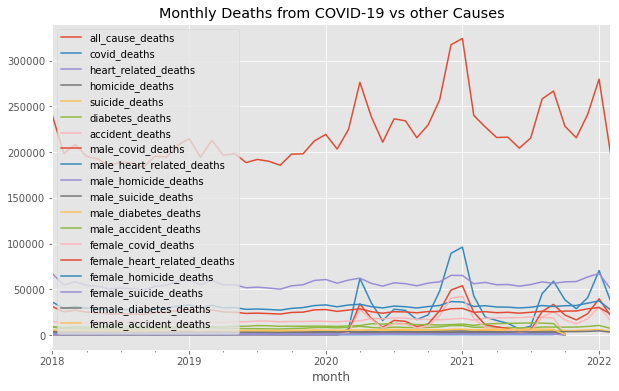

In [31]:
viz.monthly_deaths_all_cause_and_covid()

Note the data is inconsistent for 2022 on some death causes.

# Did other causes increase?

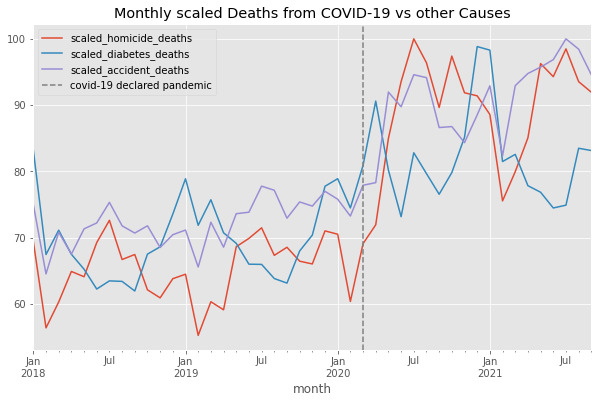

In [32]:
viz.monthly_scaled_deaths_all_cause_and_covid()

## Lets revisit gender

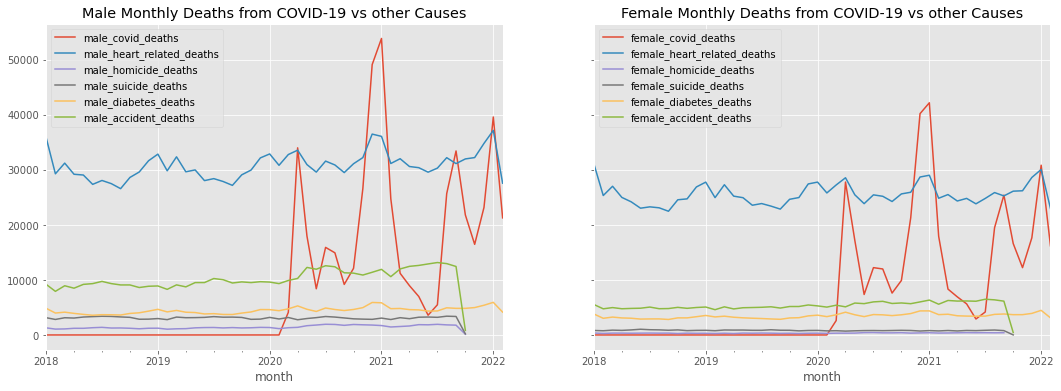

In [33]:
viz.gendered_deaths()

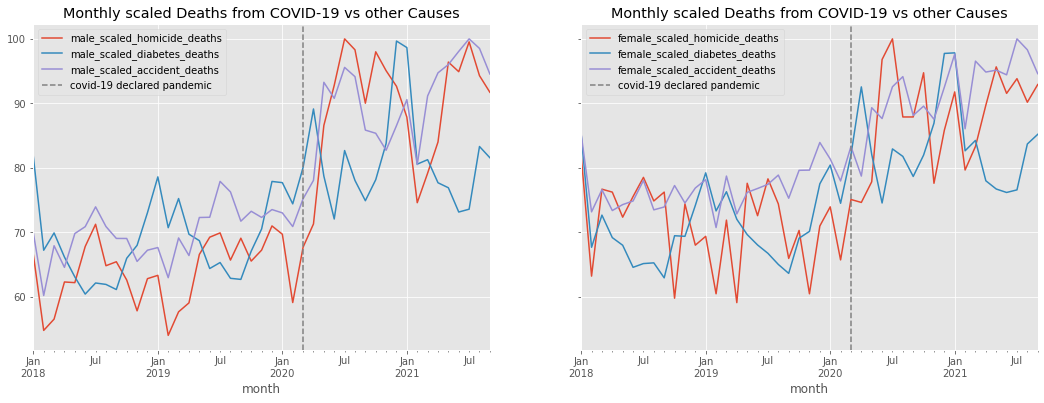

In [34]:
viz.select_gendered_deaths()

## Summary

1. There is a major correlation between age and covid deaths. Age also increases all cause mortality as expected
2. Men die from COVID in higher numbers
3. Covid was a top cause of death for a short period
4. Covid deaths are going down but death causes like homicide and diabetes remain higher
5. There are a lot of areas to spend our time money and energy on to reduce overall death and furthermore to improve the quality and quantity of life for the majority of Americans long term.

## Modeling
With more time a forecast will be done on all relevant causes of death.

# Conclusion
Covid kills, and that is absolutely horrible. But other things kill as well and have been for a long time and will continue to do so. Fortunately the covid deaths are concentrated in the ages closer to end of life.

# Future Work
CDC should provide better API for data after 2018 as the do for data prior. UCD (Underlying Cause of Death) is used in this notebook but from personal experience it can be deceiving. I would like to compare MCD (Multiple Cause of Death) and see what other causes arrise with covid cases.